##Training of the model


In [1]:
# Libaries
import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch
import torch.optim as opt
from torch.utils.data import DataLoader
from torch import nn as nn
from Custom_models import REDCN1, vgg16, ResNet9
from Training_Func import training_cycle


##Gpu activation (if is any available )

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

##Load of datasets


In [4]:
# data load
PATH = "./DATA.pth"
dataset = torch.load(PATH)
print(dataset)

{'train_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x7b88ab064eb0>, 'test_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x7b89867c44c0>, 'validation_dataloader': <torch.utils.data.dataloader.DataLoader object at 0x7b88ab0a81f0>, 'classes': ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose

##Load of the network
para este caso se utilizo una resnet 9 la cual posee capas paralelas para asi poder procesar varias imagenes al mismo tiempo y luego unirlas en capas posteriores.


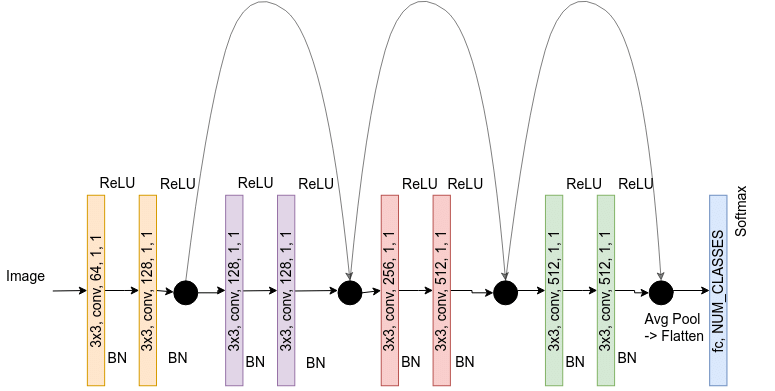




In [5]:
# Model load
Resnet = ResNet9()
Resnet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = opt.SGD(Resnet.parameters(), lr=0.001, momentum=0.9)
Resnet.eval()

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 150, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(150, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(150, 300, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(300, 300, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(300, 300, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace

##training cycle
para este caso se utiliza una funcion extener para poder tener acceso cuando sea necesario.




In [6]:
# training cycle
training_time = 70
graphic1 = []
graphic2 = []
running_epoch = []
acc = []
class_total = []
class_correct = []

(
    graphic1,
    graphic2,
    running_epoch,
    acc,
    class_total,
    class_correct,
    test_loss,
) = training_cycle(Resnet, training_time, optimizer, criterion, dataset)


[Para la epoca 1 ] 
loss: 3.972495738363266

val_loss: 3.401852872490883

Test Loss: 0.0036232066805761067

Test Accuracy : 18.42% where 1842 of 10000 were pmodelicted correctly

[Para la epoca 2 ] 
loss: 3.0558417643785476

val_loss: 2.586014534115791

Test Loss: 0.0029650780588776795

Test Accuracy : 31.8% where 3180 of 10000 were pmodelicted correctly

[Para la epoca 3 ] 
loss: 2.4384284556269646

val_loss: 2.015604858189821

Test Loss: 0.0021434831847469494

Test Accuracy : 40.99% where 4099 of 10000 were pmodelicted correctly

[Para la epoca 4 ] 
loss: 1.966383838146925

val_loss: 1.5982919988930226

Test Loss: 0.0018327553926998665

Test Accuracy : 46.87% where 4687 of 10000 were pmodelicted correctly

[Para la epoca 5 ] 
loss: 1.5867951568499208

val_loss: 1.2054426075518132

Test Loss: 0.0015498046748123892

Test Accuracy : 51.52% where 5152 of 10000 were pmodelicted correctly

[Para la epoca 6 ] 
loss: 1.2515778643131257

val_loss: 0.8889816052019596

Test Loss: 0.00159758775

##Saving the trained model


In [11]:
# Saved Model
PATH = "./trained_model/Resnet9_trained.pth"
torch.save(
    {
        "epoch": running_epoch,
        "model_state_dict": Resnet.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "loss_epoch": graphic1,
        "loss_epoch_validation": graphic2,
        "acc": acc,
        "class_total": class_total,
        "class_correct": class_correct,
        "test_loss": test_loss,
    },
    PATH,
)

In [17]:
# save pipe.pkl to output data folder
!cp ./trained_model/Resnet9_trained.pth /content/drive/MyDrive/